# Text Classification of Mario Kart 8 Deluxe - Nintendo Switch Reviews

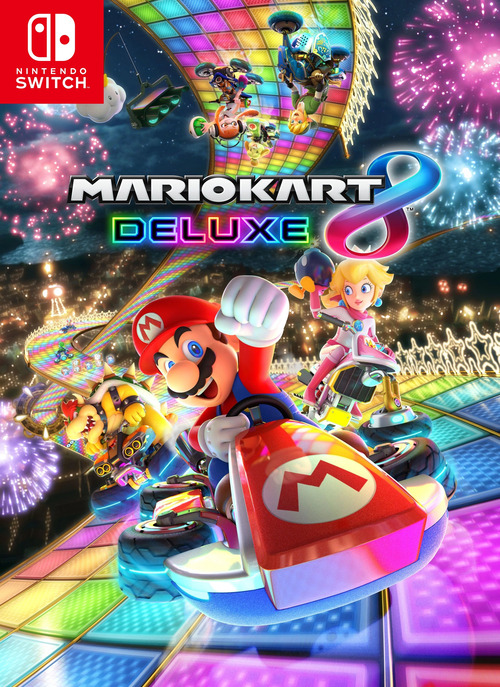

**Source**: *https://www.amazon.com/-/es/Mario-Kart-8-Deluxe-Nintendo-Switch/dp/B01N1037CV*

## Problem Statement

El objetivo de este proyecto es el desarrollo de un modelo de *Deep Learning*, con *Tensorflow*, que prediga la valoración de los usuarios en base a las reseñas que estos escriban. Para ello, se ha decidio extraer los *sentiment scores* de los comentarios, mediante el modelo *VADER* de análisis de sentimiento, empleando estas variables como predictoras.

• **Target Variable**: Rating.<br>
• **Predictors**: VADER Sentiment Scores.<br>

## Data Collection

Para desarrollar este proyecto se han extraído las reseñas del juego **Mario Kart 8 Deluxe - Nintendo Switch** *(ASIN - B01N1037CV)*, procedentes de la empresa de comercio electrónico *Amazon*. Estos datos se han obtenido a través de la plataforma de análisis de mercado *Jungle Scout*.

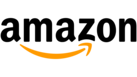

## Data Description

• **Date** - Fecha en la que se realizó la reseña.<br>
• **Country/Location** - País desde el que se realizó la reseña.<br>
• **Rating** - Valoración del usuario (1-5 estrellas).<br>
• **Author** - Usuario que realizó la reseña.<br>
• **Title** - Título de la reseña.<br>
• **Body** - Cuerpo de la reseña.<br>
• **Image links** - Enlaces de imágenes del producto.<br>
• **Image Video Links** - Enlaces de vídeos del producto.<br>
• **Verified Purchase** - Verificación de compra. Significa que el autor de la reseña compró o utilizó el artículo en Amazon (True/False).<br>
• **URL** - URL de la reseña.<br>
• **Helpful count** - Número de usuarios a los que les ha parecido que la reseña es útil.<br>
• **Variation information** - ASIN del producto.<br>
• **Styles** - Información básica del producto (Plataforma de juego y Edición).<br>

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import contractions
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy
import nltk
from langdetect import detect
import gensim

pd.options.display.max_columns=None

import warnings
warnings.filterwarnings('ignore')

## Data Reading

In [224]:
# Creamos el DataFrame con las reseñas del videojuego procedentes de Amazon, obtenidas a través de Jungle Scout

df = pd.read_csv(r'datasets/Jungle Scout Review CSV Export - us - B01N1037CV - es-ES - 03_28_2023 - 13_03_35.csv')
df.shape

(5000, 13)

In [225]:
df.head()

,Date,Country/Location,Rating,Author,Title,Body,Image links,Image Video Links,Verified Purchase,URL,Helpful count,Variation information,Styles
0,03/25/2023,United States 🇺🇸,5,Wendy Denise Strout-Dishaw,Awesome Game,Thank You! This Game Is Really Fun!,NaN,NaN,True,https://www.amazon.com/gp/customer-reviews/R22...,0,B01N1037CV,Platform For Display: Nintendo Switch | Editio...
1,03/24/2023,United States 🇺🇸,5,Anónimo,Perfecta para ocasiones sociales,La cinta es divertida. Puedo jugar con amigos ...,NaN,NaN,True,https://www.amazon.com/gp/customer-reviews/R24...,0,B01N1037CV,Platform For Display: Nintendo Switch | Editio...
2,03/20/2023,United States 🇺🇸,5,Alejandro Segura,Excelente juego,Nos divertimos mucho jugándolo,NaN,NaN,True,https://www.amazon.com/gp/customer-reviews/R36...,2,B01N1037CV,Platform For Display: Nintendo Switch | Editio...
3,03/20/2023,United States 🇺🇸,4,David,Made my teen very happy,The game went over very well and can network w...,NaN,NaN,True,https://www.amazon.com/gp/customer-reviews/R30...,6,B01N1037CV,Platform For Display: Nintendo Switch | Editio...
4,03/19/2023,United States 🇺🇸,5,Alana Ash,Obsessed!,This game is so fun! I love playing alone to c...,NaN,NaN,True,https://www.amazon.com/gp/customer-reviews/RH9...,0,B01N1037CV,Platform For Display: Nintendo Switch | Editio...


## Basic Data Exploration

In [226]:
for i in df.columns:
    print(i,',' ,'{:.1%}'.format(np.mean(df[i].isnull())),'nulls',',',type(df[i][0]),df[i].nunique(),'unique values')

Date , 0.0% nulls , <class 'str'> 1661 unique values
Country/Location , 0.0% nulls , <class 'str'> 9 unique values
Rating , 0.0% nulls , <class 'numpy.int64'> 5 unique values
Author , 0.0% nulls , <class 'str'> 4314 unique values
Title , 0.0% nulls , <class 'str'> 3018 unique values
Body , 0.1% nulls , <class 'str'> 4549 unique values
Image links , 96.5% nulls , <class 'float'> 175 unique values
Image Video Links , 100.0% nulls , <class 'numpy.float64'> 0 unique values
Verified Purchase , 0.0% nulls , <class 'numpy.bool_'> 2 unique values
URL , 30.6% nulls , <class 'str'> 3469 unique values
Helpful count , 0.0% nulls , <class 'numpy.int64'> 29 unique values
Variation information , 0.0% nulls , <class 'str'> 1 unique values
Styles , 0.0% nulls , <class 'str'> 1 unique values


In [227]:
df.describe(include='all')

,Date,Country/Location,Rating,Author,Title,Body,Image links,Image Video Links,Verified Purchase,URL,Helpful count,Variation information,Styles
count,5000,5000,5000.000000,5000,5000,4995,175,0.0,5000,3469,5000.000000,5000,5000
unique,1661,9,NaN,4314,3018,4549,175,NaN,2,3469,NaN,1,1
top,04/29/2017,United States 🇺🇸,NaN,Amazon Customer,Five Stars,Excelente,https://m.media-amazon.com/images/I/81zzfzUrhZ...,NaN,True,https://www.amazon.com/gp/customer-reviews/R22...,NaN,B01N1037CV,Platform For Display: Nintendo Switch | Editio...
freq,30,3469,NaN,238,574,39,1,NaN,4786,1,NaN,5000,5000
mean,NaN,NaN,4.744600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.395200,NaN,NaN
std,NaN,NaN,0.831811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.692613,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


## Data Wrangling

In [228]:
# Seleccionamos los comentarios procedentes de EEUU

dataset = df.loc[df['Country/Location'] == 'United States 🇺🇸 ']
dataset.shape

(3469, 13)

In [229]:
# Detección de duplicidades

dataset[dataset.duplicated()].shape

(0, 13)

In [230]:
# Create a DataFrame combining the Title and Body

dataset = dataset[['Rating', 'Title', 'Body']]
dataset['text'] = dataset['Title'] + ' ' + dataset['Body']
dataset = dataset.drop(columns=['Title', 'Body'])
dataset.columns

Index(['Rating', 'text'], dtype='object')

In [231]:
# Limpiamos el texto de forma sencilla para que el detector de idiomas pueda funcionar correctamente

def clean(text):
    nuevo_texto = text.lower()
    nuevo_texto = re.sub('[^A-Za-z]', ' ', nuevo_texto.strip())
    nuevo_texto = re.sub('\\s+', ' ', nuevo_texto)
    nuevo_texto = nuevo_texto.split(sep = ' ')
    nuevo_texto = [token for token in nuevo_texto if len(token) > 2]
    nuevo_texto = list(filter(lambda x: x != '', nuevo_texto))
    return ' '.join(nuevo_texto)

# Seleccionamos los comentarios que estén en inglés

def english_detector(text):
    lang = detect(text)
    return lang

In [232]:
dataset['text'] = dataset['text'].astype(str)
dataset['new_text'] = dataset['text'].apply(lambda x: clean(x))

# Seleccionamos aquellos comentarios que no estén vacíos

dataset['new_text'] = dataset['new_text'].replace(r'^\s*$', 'DELETE', regex=True)
dataset = dataset.loc[dataset['new_text'] != 'DELETE']

In [233]:
dataset['lang'] = dataset['new_text'].apply(lambda x: english_detector(x))

# Seleccionamos los comentarios que estén en inglés

dataset = dataset.loc[dataset['lang'] == 'en']
dataset.shape

(2852, 4)

In [234]:
dataset.head()

,Rating,text,new_text,lang
0,5,Awesome Game Thank You! This Game Is Really Fun!,awesome game thank you this game really fun,en
3,4,Made my teen very happy The game went over ver...,made teen very happy the game went over very w...,en
4,5,Obsessed! This game is so fun! I love playing ...,obsessed this game fun love playing alone comp...,en
5,4,"Good game Game is fun to play. BUT, if you wan...",good game game fun play but you want play onli...,en
6,5,Awesome! Fun! Engaging! A game that brought ba...,awesome fun engaging game that brought back ma...,en


## Looking at the distribution of Target variable

In [235]:
dataset['Rating'].value_counts(normalize=False)

5    2426
4     211
1     119
3      62
2      34
Name: Rating, dtype: int64

In [236]:
rating1 = dataset.query('Rating == 1').reset_index(drop=True)
rating2 = dataset.query('Rating == 2').reset_index(drop=True)
rating3 = dataset.query('Rating == 3').reset_index(drop=True)
rating4 = dataset.query('Rating == 4').reset_index(drop=True).head(100)
rating5 = dataset.query('Rating == 5').reset_index(drop=True).head(200)

# Seleccionamos una muestra que equipare la desigualdad de observaciones por grupo

dataset = pd.concat([rating1, rating2, rating3, rating4, rating5]).reset_index(drop=True)

In [237]:
rating_table = pd.DataFrame(zip(dataset['Rating'].value_counts(normalize=False),
                 round(dataset['Rating'].value_counts(normalize=True) * 100,2)),
                 dataset['Rating'].value_counts(normalize=False).keys()).reset_index().sort_values(by='index',ascending=True)

rating_table.columns=['Rating','Count','Percentage']

rating_table

,Rating,Count,Percentage
1,1,119,23.11
4,2,34,6.60
3,3,62,12.04
2,4,100,19.42
0,5,200,38.83


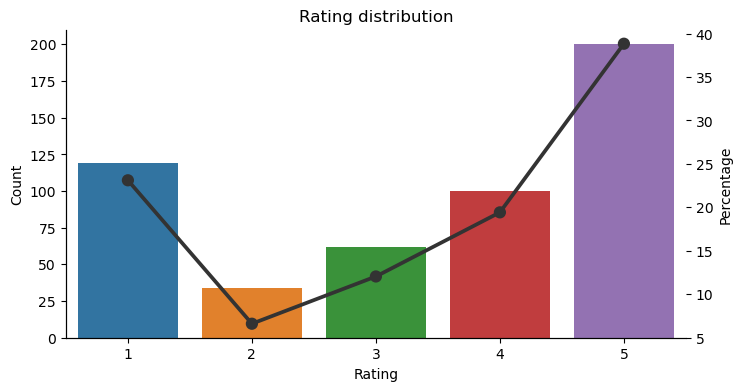

In [238]:
# Create combo chart

fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx() # secondary y-axis
sns.barplot(x='Rating', y='Count', data=rating_table, ax=ax1) # on primary ax1
sns.pointplot(x='Rating', y='Percentage', data=rating_table, color='#333', ax=ax2) # on secondary ax2
plt.title('Rating distribution')
plt.show()

Se observa que hay categorías poco representadas en la muestra, por lo que se opta por reagrupar observaciones en nuevas categorías, que puedan paliar esta falta de representatividad muestral.

## Dealing with Class Imbalance

In [239]:
# Juntamos las categorías poco representadas en la muestra

dataset['Rating'] = dataset['Rating'].replace([1,2,3],'Bajo')
dataset['Rating'] = dataset['Rating'].replace([4,5],'Alto')

# Ordenamos de forma ascendente estas variables, ya que son ordinales, donde 'Bajo' tomará el valor cero y viceversa

dataset['Rating'] = dataset['Rating'].apply(lambda x: ['Bajo', 'Alto'].index(x))

In [240]:
rating_table = pd.DataFrame(zip(dataset['Rating'].value_counts(normalize=False),
                 round(dataset['Rating'].value_counts(normalize=True) * 100,2)),
                 dataset['Rating'].value_counts(normalize=False).keys()).reset_index().sort_values(by='index',ascending=True)

rating_table.columns=['Rating','Count','Percentage']

rating_table

,Rating,Count,Percentage
1,0,215,41.75
0,1,300,58.25


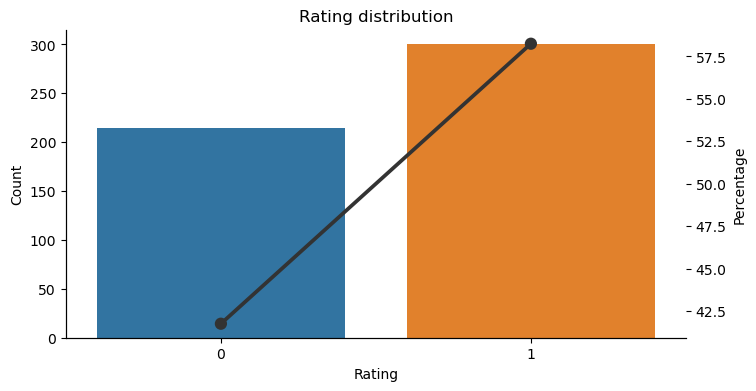

In [241]:
# Create combo chart

fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx() # secondary y-axis
sns.barplot(x='Rating', y='Count', data=rating_table, ax=ax1) # on primary ax1
sns.pointplot(x='Rating', y='Percentage', data=rating_table, color='#333', ax=ax2) # on secondary ax2
plt.title('Rating distribution')
plt.show()

## Text normalization

In [242]:
abbreviations = {
    '2ce' : 'twice',
    'asf' : 'as fuck',
    'cart' : 'kart',
    'cc' : 'cubic centimeters',
    'delixe' : 'deluxe',
    'dlc' : 'downloadable content',
    'mariokart' : 'mario kart',
    'mk' : 'mario kart',
    'mk8' : 'mario kart 8',
    'mkd8' : 'mario kart 8 deluxe',
    'mk8d' : 'mario kart 8 deluxe',
    'mk8dx' : 'mario kart 8 deluxe',
    'nope' : 'no',
    'rng' : 'random number generator',
    'scammmmmm' : 'scam',
    'smh' : 'shaking my head',
    'xmas' : 'christmas',
}

def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [243]:
# Eliminar espacios

def eliminar_espacios(text):
    return ' '.join(text.split())

# Texto en minúsculas

def texto_to_lower(text):
    return text.lower()

# Reemplazar contracciones usando la librería 'contractions' https://github.com/kootenpv/contractions

def replace_contractions(text):
    expanded_words = []
    for t in text.split():
        expanded_words.append(contractions.fix(t))
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Reemplazar argot 

def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens=[convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

# Tokenizador

def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

# Quitar stop words

def quitar_stopwords(tokens):
    stop_words = list(stopwords.words('english'))
    #new_stopwords = ['would']
    #stop_words.extend(new_stopwords)
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence

# Eliminar signos de puntuación (nos quedamos solo lo alfanumérico)

def quitar_puntuaciones(tokens):
    words = [word for word in tokens if word.isalnum()]
    return words

# Lemmatization

nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])

def lematizar(tokens):
    sentence = ' '.join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos a minúsculas
    mytokens = [word.lemma_ if word.lemma_ != '-PRON-' else word.lower_ for word in mytokens]
    # Extraemos el text en una string
    return mytokens

# Deshacer tokenizado

def deshacer(tokens):
    tokens = ' '.join(tokens)
    return tokens

In [244]:
# Quitar espacios

dataset['normalize'] = dataset['text'].apply(lambda x: eliminar_espacios(x))

# Minúsculas

dataset['normalize'] = dataset['normalize'].apply(lambda x: texto_to_lower(x))

# Contracciones

dataset['normalize'] = dataset['normalize'].apply(lambda x: replace_contractions(x))

# Argot

dataset['normalize'] = dataset['normalize'].apply(lambda x: convert_abbrev_in_text(x))

# Tokenizar

dataset['normalize'] = dataset['normalize'].apply(lambda x: tokenization(x))

# Quitar stop words

dataset['normalize'] = dataset['normalize'].apply(lambda x: quitar_stopwords(x))

# Quitar puntuación

dataset['normalize'] = dataset['normalize'].apply(lambda x: quitar_puntuaciones(x))

# Lemmatization

dataset['normalize'] = dataset['normalize'].apply(lambda x: lematizar(x))

# Deshacer

dataset['new_text'] = dataset['normalize'].apply(lambda x: deshacer(x))

In [245]:
# Creación de ngrams

ngram_list = []

documents = dataset['new_text'].to_list()
sentence_stream = [doc.split(' ') for doc in documents]

bigram = gensim.models.Phrases(sentence_stream, min_count=5, threshold=10)
bigram_phraser = gensim.models.phrases.Phraser(bigram)

trigram = gensim.models.Phrases(bigram[sentence_stream], min_count=5, threshold=20)
trigram_phraser = gensim.models.phrases.Phraser(trigram)

for sent in sentence_stream:
    bigrams_ = bigram_phraser[sent]
    trigrams_ = trigram_phraser[bigram_phraser[sent]]
    ngram_list.append(trigrams_)
    
dataset['ngram'] = pd.Series(ngram_list)
dataset['new_text'] = dataset['ngram'].apply(lambda x: deshacer(x))

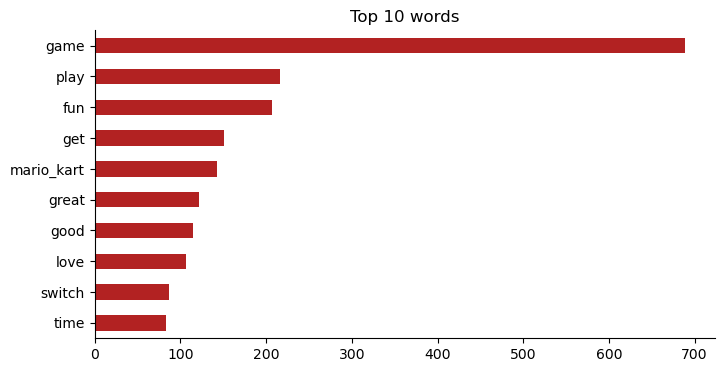

In [246]:
# Top 10 palabras (sin stopwords, lematizadas y con ngramas)

tweets_tidy = dataset.explode(column='ngram')
tweets_tidy['ngram'].value_counts(ascending=False).head(10)[::-1].plot(kind='barh', color='firebrick', figsize=(8,4))
plt.title('Top 10 words')
plt.show()

## VADER Sentiment Scoring

In [247]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

dataset = dataset.reset_index().rename(columns={'index':'Id'})

# Run the polarity scores on the entire dataset

res = {}

for i, row in tqdm(dataset.iterrows(), total=len(dataset)):
    text = row['new_text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/515 [00:00<?, ?it/s]

In [248]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(dataset, how='left')

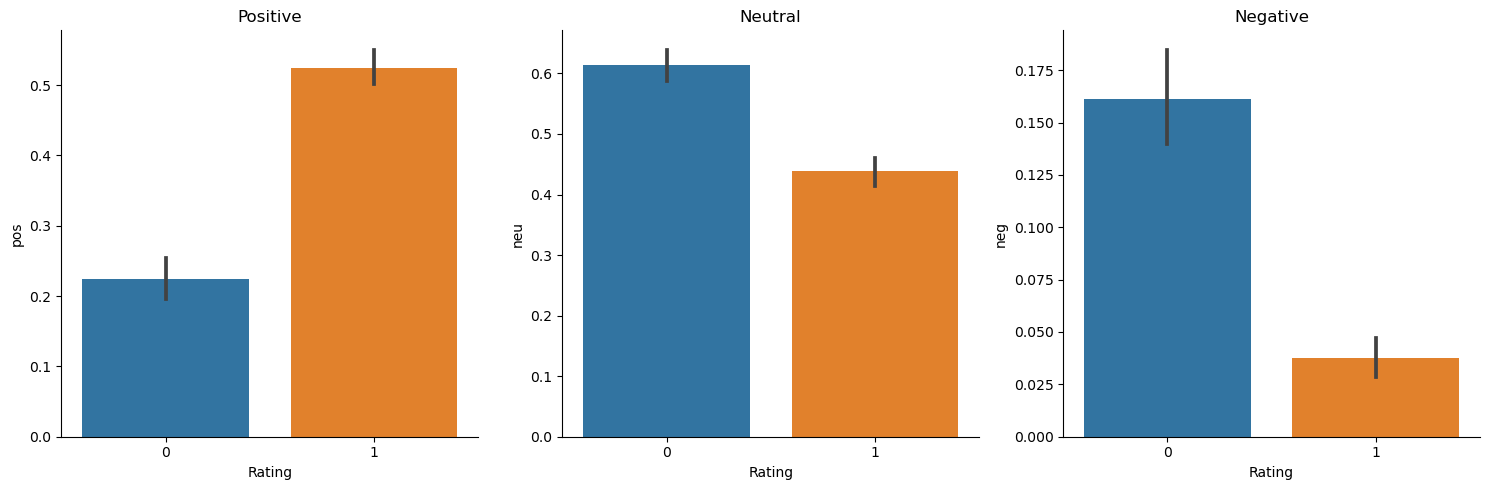

In [249]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

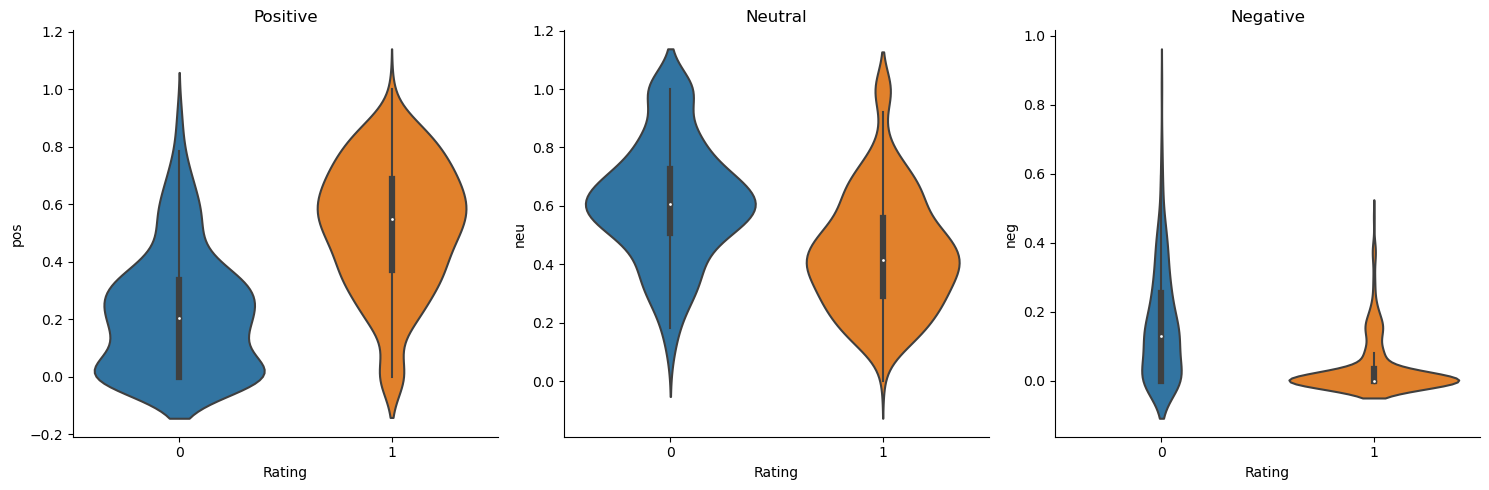

In [250]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.violinplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.violinplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.violinplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Selecting final predictors for Machine Learning and Splitting the data into Training and Testing sample

In [251]:
# Define X and y

X = vaders[['pos', 'neg', 'neu']]
y = vaders['Rating']

# Reparto train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(412, 3) (103, 3)
(412,) (103,)


## Using Tensorflow to train the classification model

In [272]:
# Define per-fold score containers

acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator

from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)

# K-fold Cross Validation model evaluation

fold_no = 1

for train, test in kfold.split(X, y):
    
    import tensorflow as tf
    tf.random.set_seed(42)
    
    # Define the model architecture
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
    
    # Compile the model
    model.compile(
        loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.keras.optimizers.Adam(lr=0.03),
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')])
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    # Fit data to model
    history = model.fit(X_train, y_train, epochs=4)
    
    # Generate generalization metrics
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    # Increase fold number
    fold_no = fold_no + 1
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/4
13/13 [==============================] - 1s 3ms/step - loss: 0.7057 - accuracy: 0.6772 - precision: 0.7131 - recall: 0.7458
Epoch 2/4
13/13 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.7621 - precision: 0.7773 - recall: 0.8292
Epoch 3/4
13/13 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.7718 - precision: 0.7808 - recall: 0.8458
Epoch 4/4
13/13 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7646 - precision: 0.8122 - recall: 0.7750
Score for fold 1: loss of 0.48436054587364197; accuracy of 79.61165308952332%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/4
13/13 [==============================] - 1s 3ms/step - loss: 0.6707 - accuracy: 0.7087 - precision: 0.7521 - recall: 0.7458
Epoch 2/4
13/13 [==============================] - 0s 3ms/

## Visualisation and Evaluation of the classification model using TensorFlow

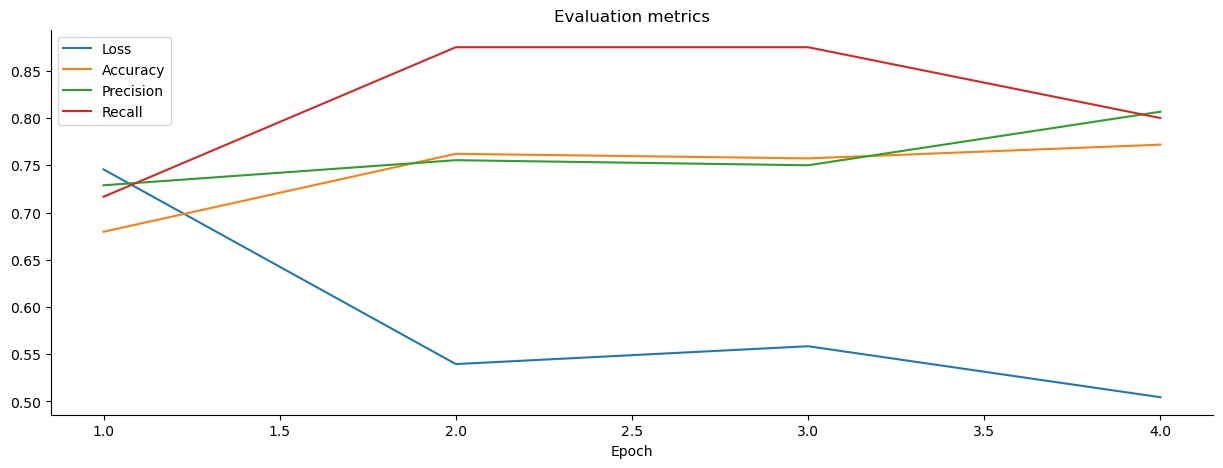

In [273]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (15, 5)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, 5), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 5), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 5), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 5), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Predictions for Classification Model with TensorFlow

In [274]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


## Area under the ROC Curve

ROC_AUC Score :  0.8579457364341085
Function for ROC_AUC Score :  0.8579457364341085
Threshold value is:  0.54520667


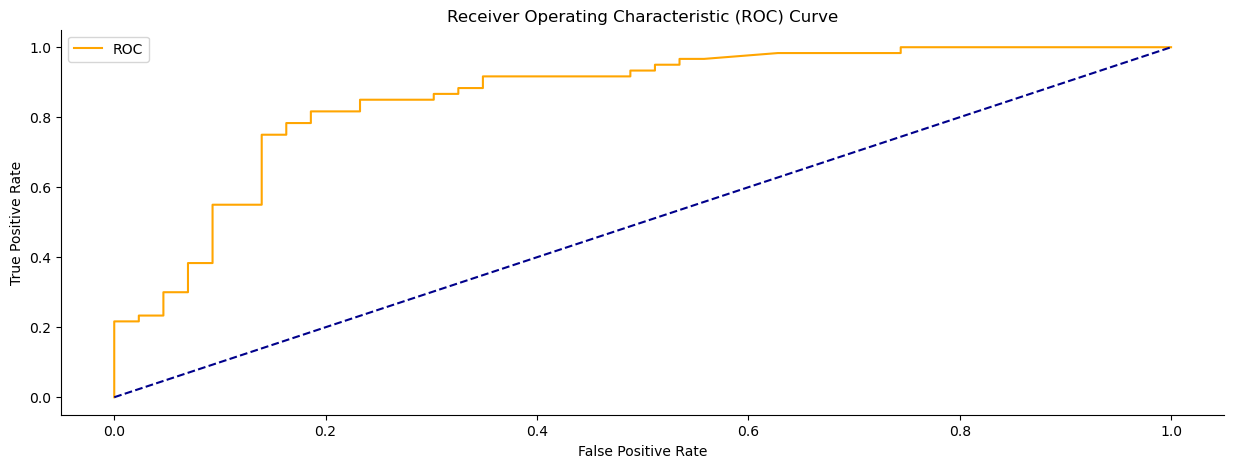

In [275]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score : ',roc_auc)
print('Function for ROC_AUC Score : ',roc_auc_score(y_test, predictions)) # Function present
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Threshold value is: ',optimal_threshold)
plot_roc_curve(fpr, tpr)

## Predictions for Classification Model with TensorFlow

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        43
           1       0.86      0.80      0.83        60

    accuracy                           0.81       103
   macro avg       0.80      0.81      0.80       103
weighted avg       0.81      0.81      0.81       103

[[35  8]
 [12 48]]

Accuracy of the model on Testing Sample Data: 0.806
Precision of the model on Testing Sample Data: 0.857
Recall of the model on Testing Sample Data: 0.800


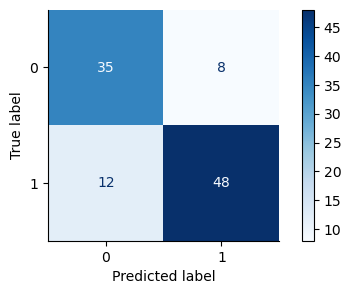

In [276]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

prediction_classes = [1 if prob > optimal_threshold else 0 for prob in np.ravel(predictions)]
print(classification_report(y_test, prediction_classes))
print(confusion_matrix(y_test, prediction_classes))

from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'\nAccuracy of the model on Testing Sample Data: {accuracy_score(y_test, prediction_classes):.3f}')
print(f'Precision of the model on Testing Sample Data: {precision_score(y_test, prediction_classes):.3f}')
print(f'Recall of the model on Testing Sample Data: {recall_score(y_test, prediction_classes):.3f}')

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, prediction_classes)).plot(cmap=plt.cm.Blues)
fig = plt.gcf()
fig.set_size_inches(6, 3)
plt.show()